# 실습6. Curve fitting
주어진 실험데이터는 $(t_n, x_n)$꼴입니다. 주어진 데이터가 $x=vt$로 표현된다고 할 때,

1) 최소 제곱법으로 v를 구하고 (25점) 실험 데이터와 함께 그려 잘 맞는지 확인하세요 (25점).

In [4]:
from google.colab import drive
drive.mount('/content/data_set.txt')

Drive already mounted at /content/data_set.txt; to attempt to forcibly remount, call drive.mount("/content/data_set.txt", force_remount=True).


v = 4.464356234641225


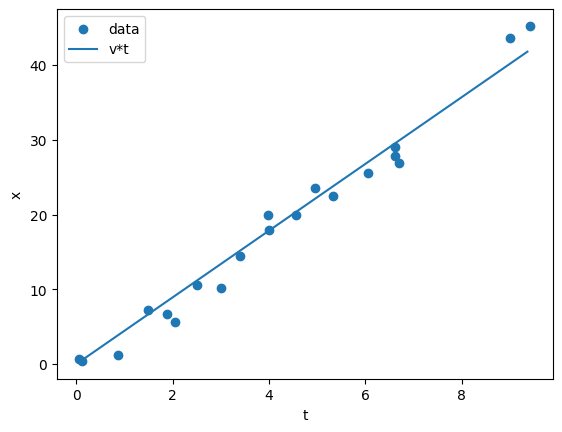

In [10]:
import numpy as np, matplotlib.pyplot as plt
data=np.loadtxt("/content/data_set.txt/MyDrive/data_set.txt")
t = data[:,0]
x = data[:,1]
Stx = np.sum(t*x)
Stt = np.sum(t*t)
v = Stx/Stt
print("v =", v)

r = np.arange(min(data[:,0]), max(data[:,0]), 0.1)
plt.scatter(t, x, label = 'data')
plt.plot (r, v*r, label = 'v*t')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

위의 코드는 최소제곱법을 이용해 주어진 데이터에 대해 곡선맞춤을 한 뒤, v값을 구하여 v값에 대한 일차함수를 데이터 값들과 함께 그래프로 나타낸 코드이다. 최소제곱법에서 오류 $E$는 $$E = \sum_{n=1}^N [y_n-f(x_n)]^2$$
으로 나타낼 수 있으며, 따라서 $f(x)= ax$의 꼴일때 오류의 최솟값 E에 대해 $$\dfrac{\partial E}{\partial a} = -2\sum_{n=1}^N [y_n-ax_n]x_n = 0$$ 을 만족한다. 따라서 오류 $E$를 최소화하는 상수 $a$는 $a = \dfrac{\sum x_ny_n}{\sum x_n^2}$이다. \\
위의 코드에서는 먼저 변수 data에 주어진 데이터인 data.txt를 저장하였으며, 이후 주어진 텍스트 파일의 1열의 값들을 변수 t에 리스트의 형태로 저장하였고 2열의 값들을 변수 x에 리스트의 형태로 저장하였다. 변수 Stx는 위에서 구한 a에 대한 식의 분자에 해당하는 값으로, t와 x 리스트의 동일위치의 각 원소들을 곱한값을 전부 더한 값이다. 변수 Stt는 위에서 구한 a에 대한 식의 분모에 해당하는 값으로, 리스트 t의 각 원소들을 제곱하여 전부 더한 값이다. 이후 Stx를 Stt로 나누어 v의 값을 구한뒤 v값을 출력하도록 하였다.
r은 t의 최솟값부터 최댓값을 0.1의 간격으로 나눈 배열이다. 이후 matplotlib 모듈을 활용해 x축이 t이고, y축이 x인 좌표평면 위에 주어진 데이터들을 산점도 형태로 나타내었으며, 최소 제곱법을 통해 구한 v값을 바탕으로 $x = vt$ 그래프를 나타내었다.

2) 경사 하강법으로 v를 구하고 (25점) 실험 데이터와 함께 그려 잘 맞는지 확인하세요 (25점).

v = 4.41435627324086


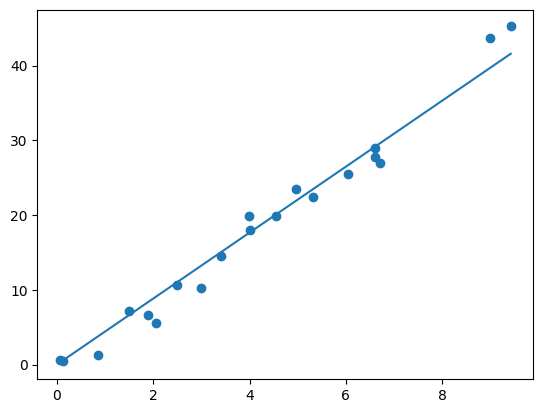

In [13]:
import numpy as np, matplotlib.pyplot as plt
data=np.loadtxt("/content/data_set.txt/MyDrive/data_set.txt")
t = data[:,0]
x = data[:,1]

def f(t, v):
  return v*t

def E(x, t, v):
  return np.sum((x-f(t, v))**2)

eps = 1.0E-5; c= 0.001; dv=0.1;
delta_v = 0.1;
v =5;

while(np.abs(delta_v)>eps):
  dEdv = (E(x, t, v+dv) - E(x, t, v))/dv
  delta_v = -c*dEdv
  v+=delta_v

print("v =", v)

r = np.arange(min(data[:,0]), max(data[:,0]), 0.01)
plt.scatter(t, x)
plt.plot (r, v*r)
plt.show()

위의 코드는 경사 하강법을 이용해 주어진 데이터에 대해 곡선맞춤을 한 뒤, v값을 구하여 v값에 대한 일차함수를 데이터 값들과 함께 그래프로 나타낸 코드이다. 경사 하강법에서 조절변수 $\vec{a} = (a_{1}, a_{2}, \cdots, a_{M})$ 에 대해 오류 $E$는 $$E(\vec{a}) = \sum_{n=1}^N [y_n-f(x_n;\vec{a})]^2$$
으로 나타낼 수 있으며, 따라서 $f(x)= ax$의 꼴일때  E에 대해 $$\dfrac{\partial E}{\partial a} = -2\sum_{n=1}^N [y_n-ax_n]x_n = 0$$ 을 만족한다. 이후
$$a \rightarrow a+c \sum_{n=1}^N [y_n-ax_n]x_n$$의 방법으로 a값을 업데이트 한다. \\
위의 코드에서는 먼저 변수 data에 주어진 데이터인 data.txt를 저장하였으며, 이후 주어진 텍스트 파일의 1열의 값들을 변수 t에 리스트의 형태로 저장하였고 2열의 값들을 변수 x에 리스트의 형태로 저장하였다. 사용자 정의 함수 f(t, v)는 변수 t와 v를 입력받아 v*t의 값을 반환하며, 사용자 정의 함수 E(x, t, v)는 변수 x, t, v를 입력받아 $\sum(x-vt)^2$의 값을 반환한다. 변수 eps는 v값의 정확도를 나타내는 변수로 1.0E-5로 설정하였으며, c값은 0.001, dv는 $\frac{\partial E}{\partial v}$의 분모를 나타내는 변수로 0.1로 설정하였다. 변수 delta_v는 $v \rightarrow v+dv$의 $dv$ 값을 의미하며, v의 초깃값은 5로 설정하였다. 이후 while문을 활용해 delta_v의 절댓값이 epsilon보다 작아질 때 까지 경사하강법을 적용하여 v값을 업데이트 하였다.while문 내의

```
dEdv = (E(x, t, v+dv) - E(x, t, v))/dv
delta_v = -c*dEdv
v+=delta_v
```
는 위에서 구한
$$a \rightarrow a+c \sum_{n=1}^N [y_n-ax_n]x_n$$을 의미한다.
r은 t의 최솟값부터 최댓값을 0.1의 간격으로 나눈 배열이다. 이후 matplotlib 모듈을 활용해 x축이 t이고, y축이 x인 좌표평면 위에 주어진 데이터들을 산점도 형태로 나타내었으며, 경사 하강법을 통해 구한 v값을 바탕으로 $x = vt$ 그래프를 나타내었다.